In [1]:
from sklearn import datasets
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay

# 1. create data and visiualization

In [2]:
circles_data = datasets.make_circles()
moon_data = datasets.make_moons()
linear_x = np.array([[0,2],[2,0],[4.5,0],[4.5,3],[3,4.5],
              [2,1],[1.5,3],[4,4],[0,3.5],[3,2.5],
              [-1,-1],[-3,-4.5],[-2,-3],[-4,-4],[0,-2.5],
              [-1,-3.5],[-3.5,-1],[0,-3.5],[-3,-1],[-4,0]])
linear_y = np.array([0] * 10 + [1] * 10)

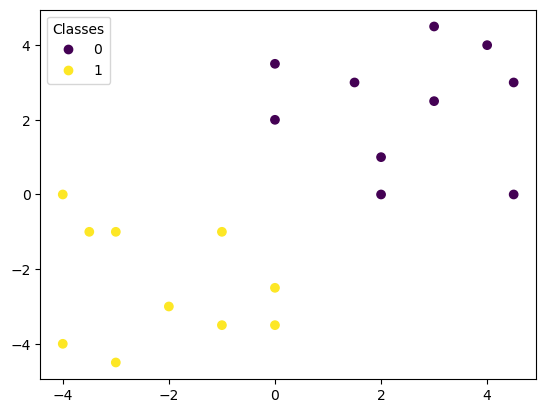

In [3]:
fig, ax = plt.subplots()
scatter = ax.scatter(linear_x[:, 0], linear_x[:, 1], c=linear_y, cmap='viridis')
ax.legend(*scatter.legend_elements(), title="Classes")
plt.show()

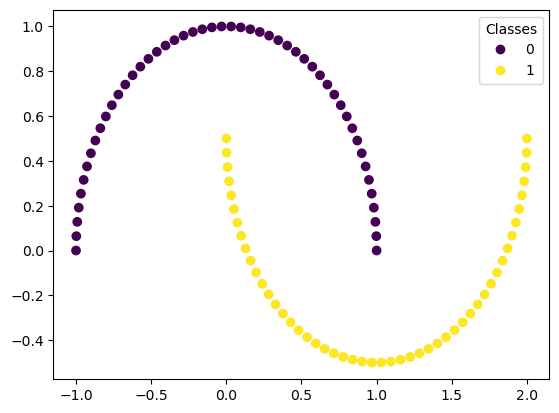

In [4]:
fig, ax = plt.subplots()
scatter = ax.scatter(moon_data[0][:, 0], moon_data[0][:, 1], c=moon_data[1], cmap='viridis')
ax.legend(*scatter.legend_elements(), title="Classes")
plt.show()

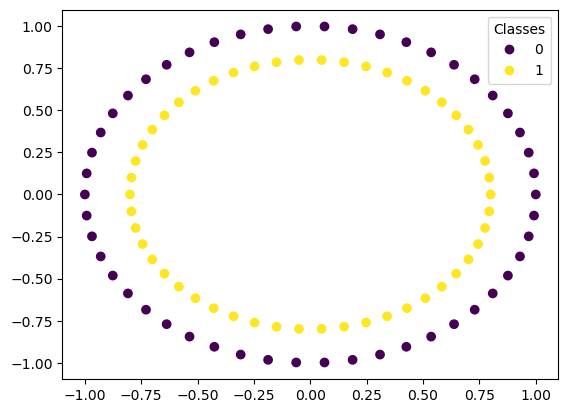

In [5]:
fig, ax = plt.subplots()
scatter = ax.scatter(circles_data[0][:, 0], circles_data[0][:, 1], c=circles_data[1], cmap='viridis')
ax.legend(*scatter.legend_elements(), title="Classes")
plt.show()

# 2. create SVM model to fit data

## 2.1 create linear SVM model and delete some data point to observe the influence of result

In [6]:
clf_linear = SVC(kernel='linear')

the support vectors are: 
 [[ 0.  2.]
 [ 2.  0.]
 [-1. -1.]]


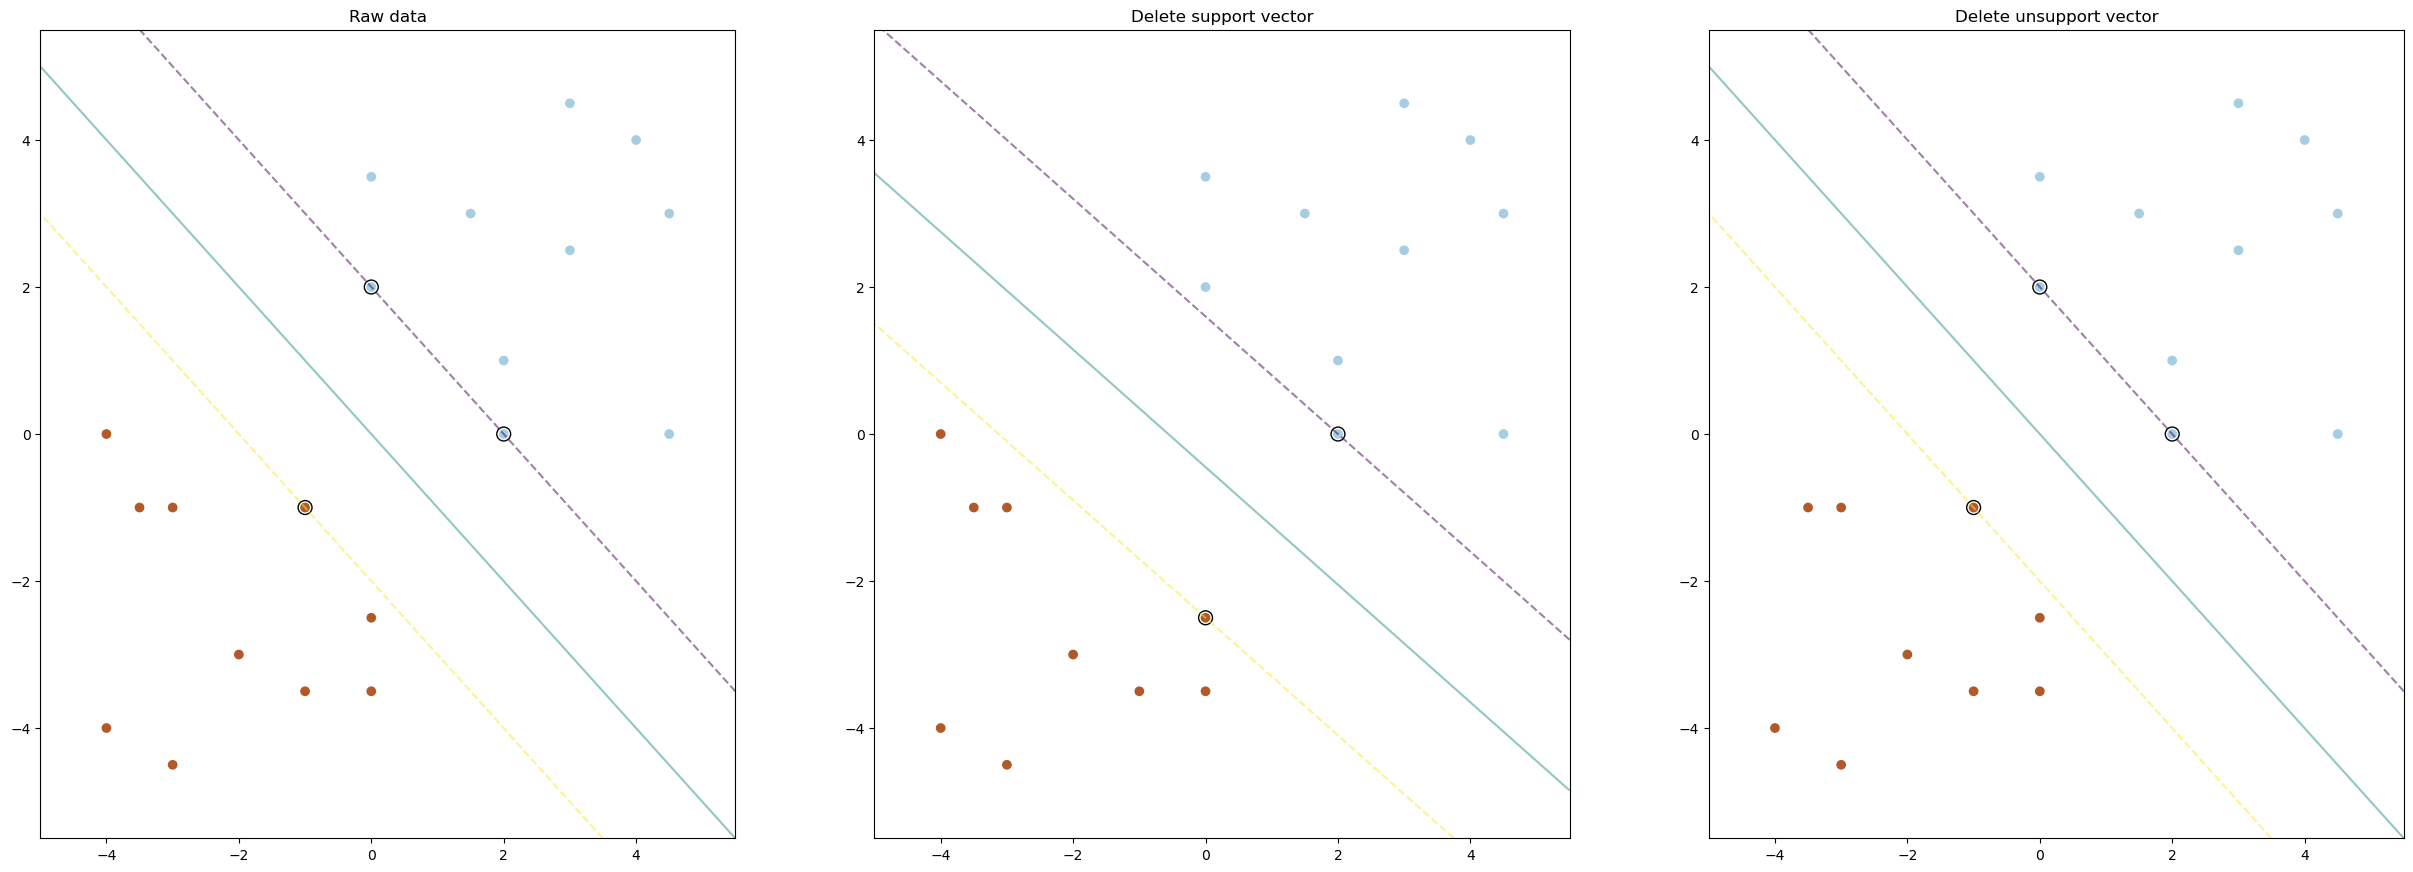

In [7]:
# define a function for visualization
def plot(x, y, clf, ax):
    # plot scatter
    ax.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired)
    # plot decesion boundary
    DecisionBoundaryDisplay.from_estimator(
        clf,
        x,
        plot_method="contour",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", '-', "--"],
        ax=ax
    )
    # plot support vector
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors='k'
    )


fig, axs = plt.subplots(1,3)
fig.set_size_inches(30.5, 10.5, forward=True)

# raw data
clf_linear.fit(linear_x, linear_y)
axs[0].set_title("Raw data")
plot(linear_x, linear_y, clf_linear, axs[0])

# delete support vector
print(f"the support vectors are: \n {clf_linear.support_vectors_}")
# delete [-1, -1]
new_linear_x = linear_x[np.any(linear_x != clf_linear.support_vectors_[2], axis=1)]
new_linear_y = np.delete(linear_y, np.where((linear_x[:, 0] == clf_linear.support_vectors_[2][0]) & (linear_x[:, 1] == clf_linear.support_vectors_[2][1]))[0][0])
clf_linear.fit(new_linear_x, new_linear_y)
axs[1].set_title("Delete support vector")
plot(new_linear_x, new_linear_y, clf_linear, axs[1])

# delete unsupport vector
# delete point not called support vector [-4, 0]
del_linear_x = linear_x[np.any(linear_x != [-4, 0], axis=1)]
del_linear_y = np.delete(linear_y, 19)
clf_linear.fit(del_linear_x, del_linear_y)
axs[2].set_title("Delete unsupport vector")
plot(del_linear_x, del_linear_y, clf_linear, axs[2])

plt.show()

## 2.2 create non-linear SVM model to observe the influence of different penalty factor in soft margin width and decision boundary 

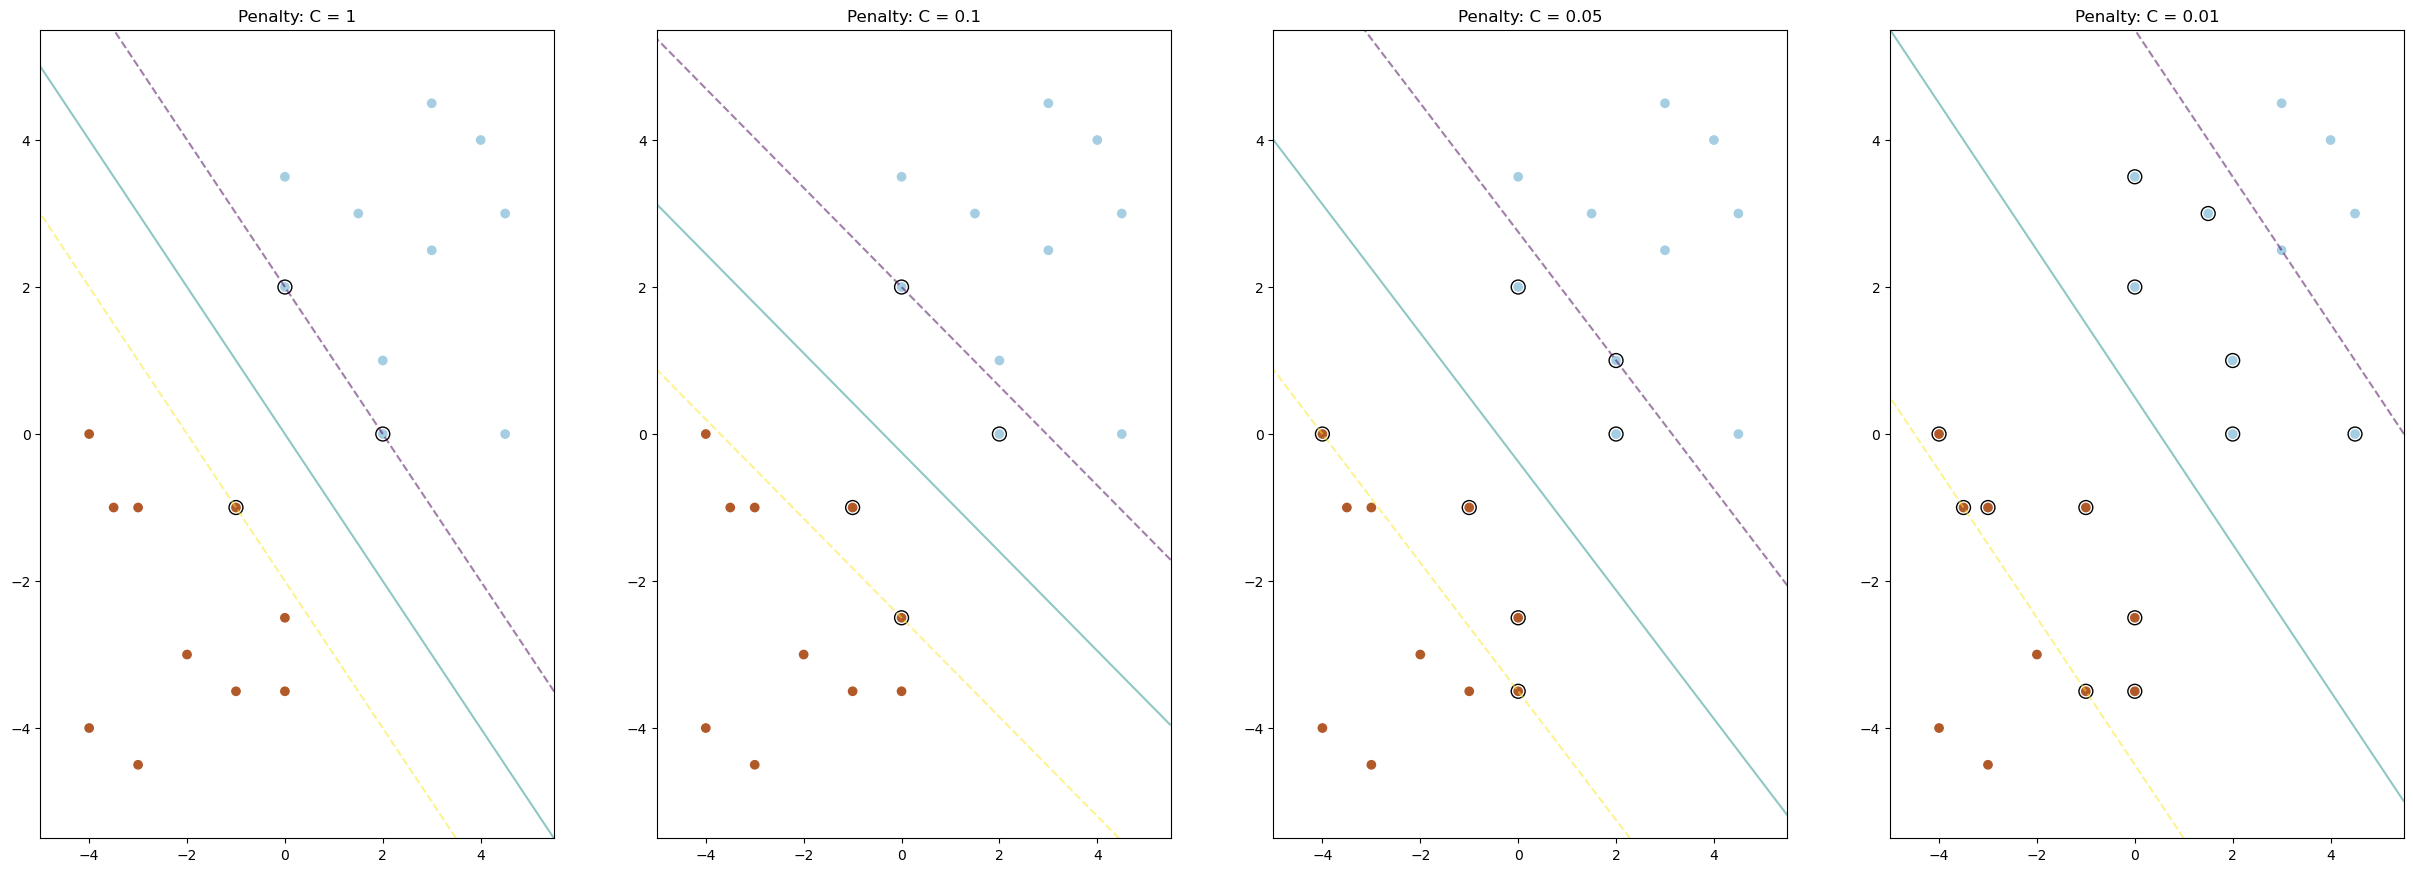

In [22]:
fig, axs = plt.subplots(1, 4)
fig.set_size_inches(30.5, 10.5, forward=True)

for penalty, fig_num in zip([1, 0.1, 0.05, 0.01], list(range(4))):
    clf = SVC(kernel='linear', C=penalty)
    clf.fit(linear_x, linear_y)
    
    plot(linear_x, linear_y, clf, axs[fig_num])
    axs[fig_num].set_title(f"Penalty: C = {penalty}")

plt.show()

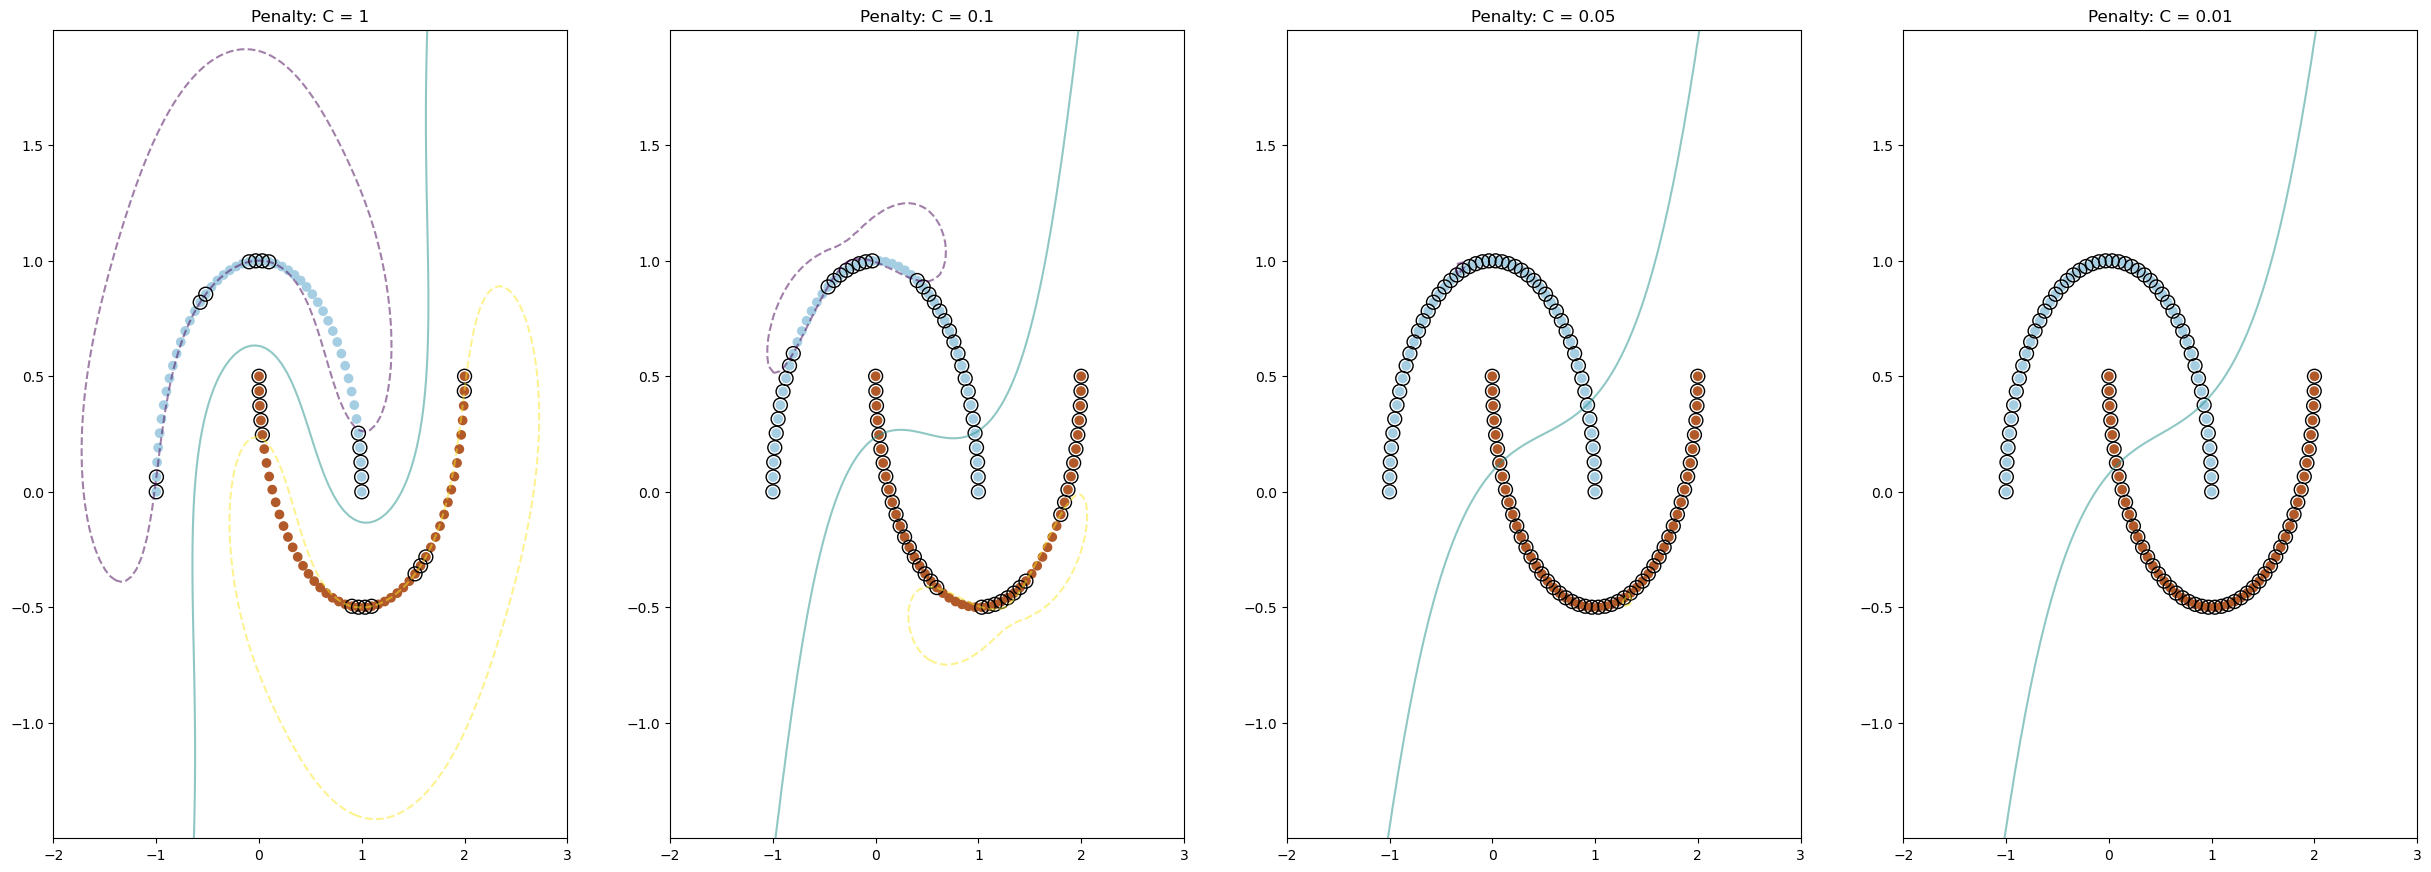

In [24]:
fig, axs = plt.subplots(1, 4)
fig.set_size_inches(30.5, 10.5, forward=True)

for penalty, fig_num in zip([1, 0.1, 0.05, 0.01], list(range(4))):
    clf = SVC(C=penalty)
    clf.fit(moon_data[0], moon_data[1])
    
    plot(moon_data[0], moon_data[1], clf, axs[fig_num])
    axs[fig_num].set_title(f"Penalty: C = {penalty}")

plt.show()

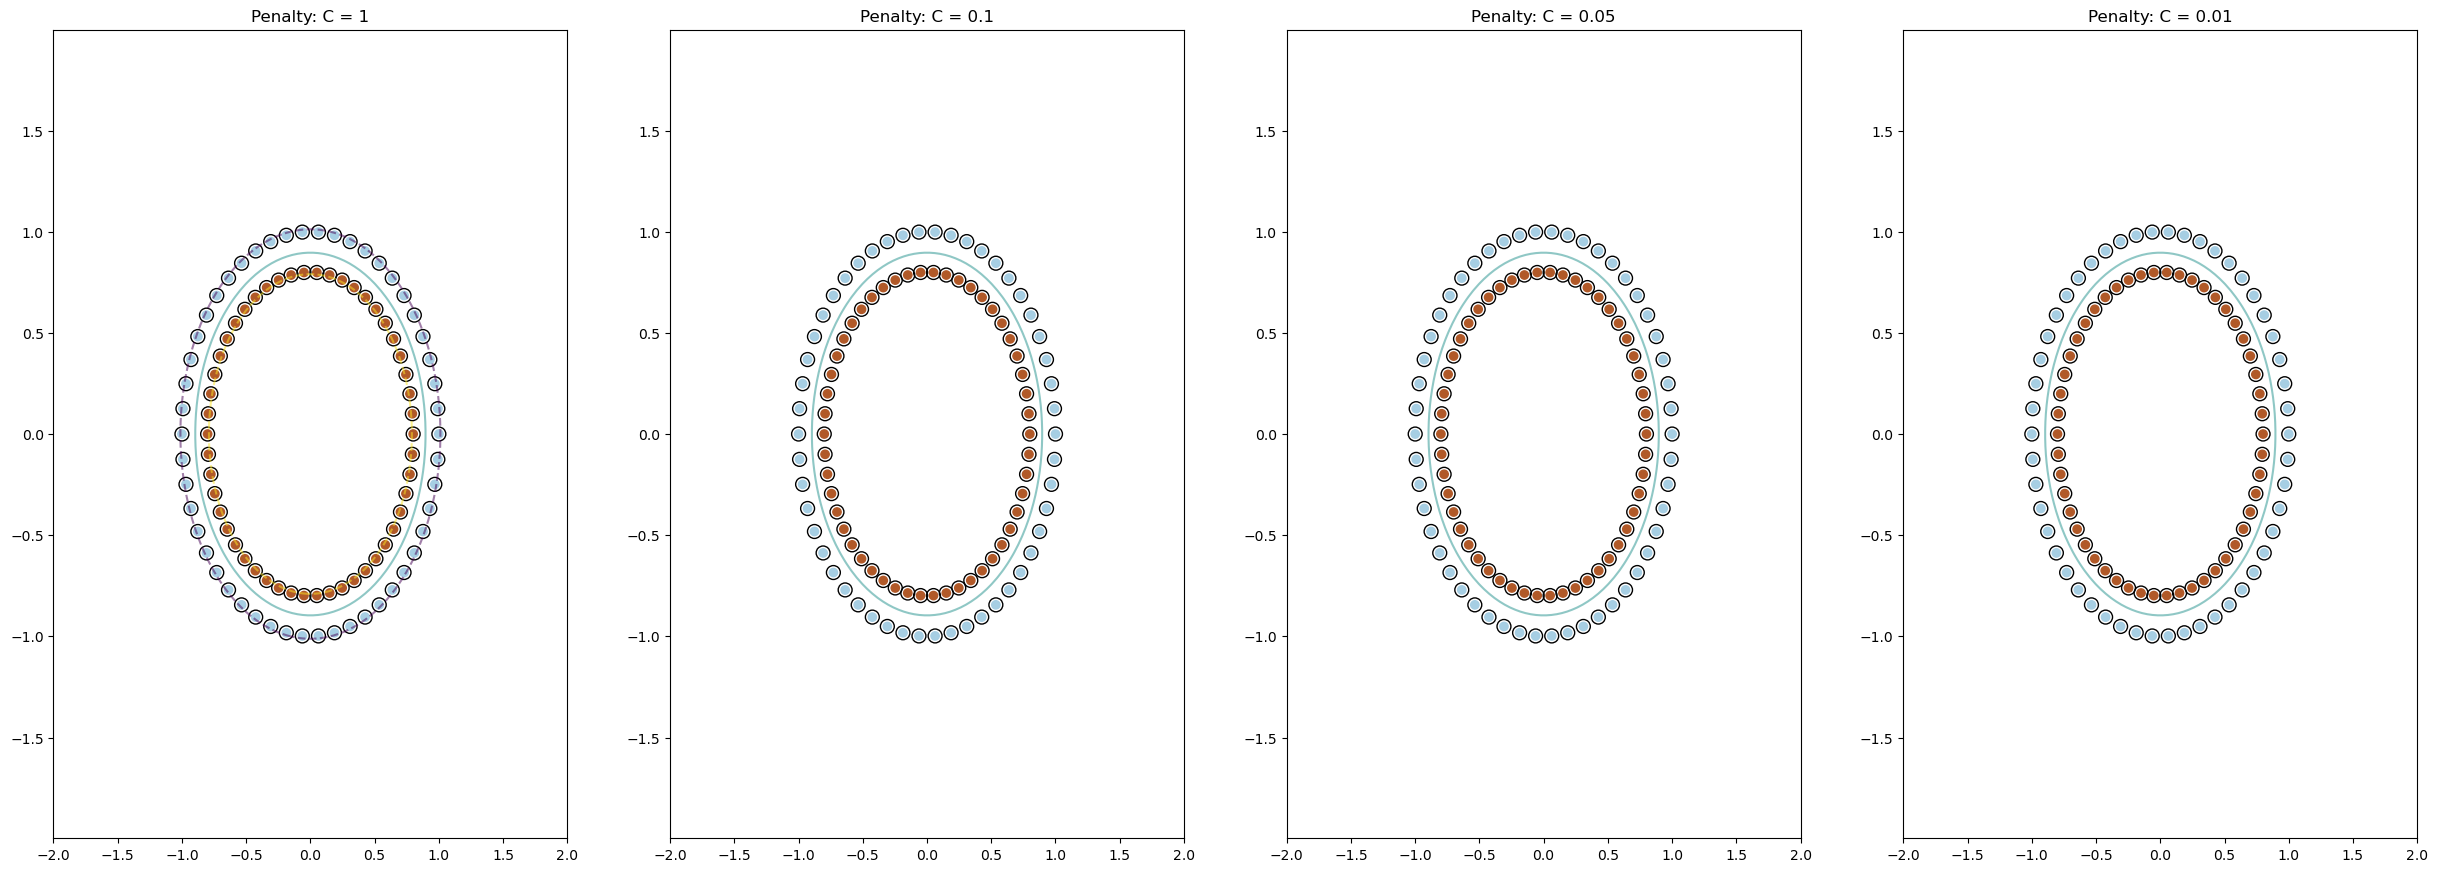

In [27]:
fig, axs = plt.subplots(1, 4)
fig.set_size_inches(30.5, 10.5, forward=True)

for penalty, fig_num in zip([1, 0.1, 0.05, 0.01], list(range(4))):
    clf = SVC(C=penalty)
    clf.fit(circles_data[0], circles_data[1])
    
    plot(circles_data[0], circles_data[1], clf, axs[fig_num])
    axs[fig_num].set_title(f"Penalty: C = {penalty}")

plt.show()

## 2.3 Using kernel methods to construct SVM model fitting circles and moon data

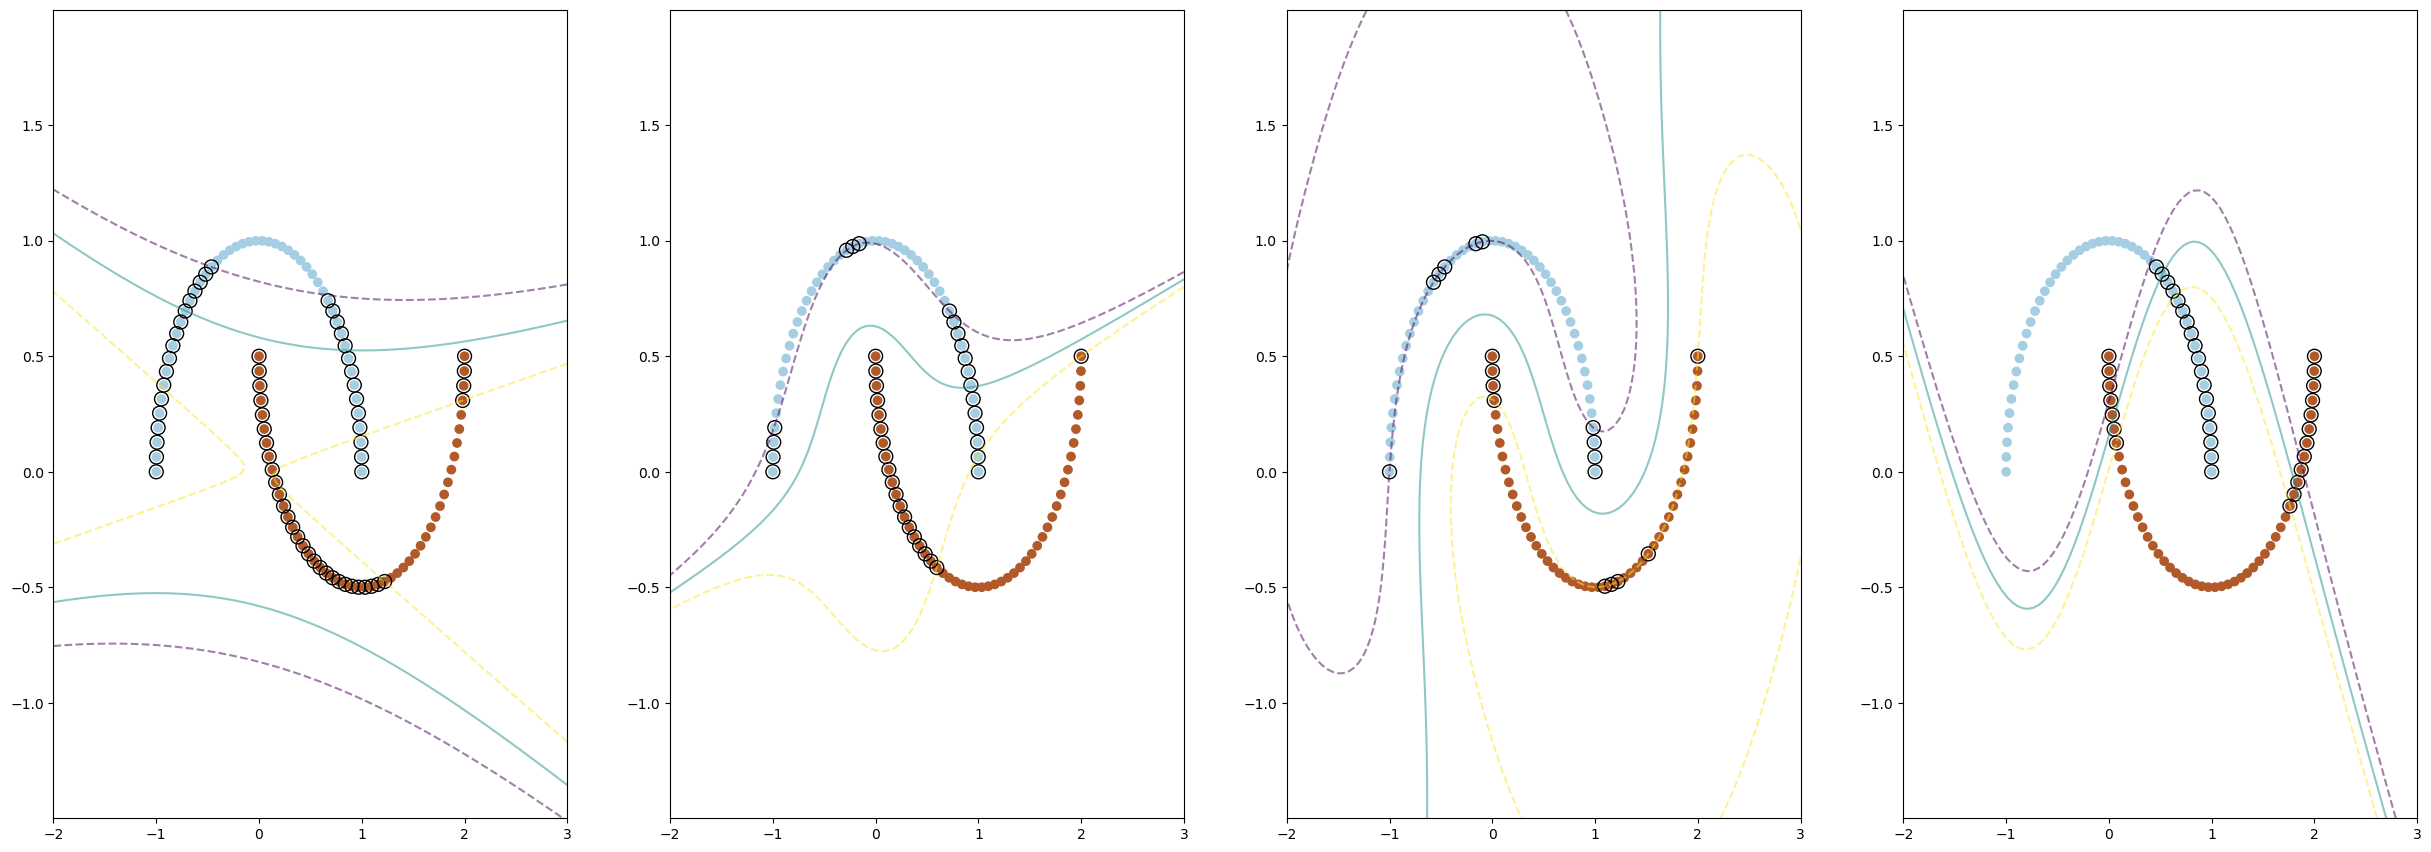

In [28]:
fig, axs = plt.subplots(1, 4)
fig.set_size_inches(30.5, 10.5, forward=True)

method_list = [['poly', 2],
               ['poly', 3],
               ['rbf', 0.7],
               ['sigmoid', 0.5]]

C = 3

for method, fig_num in zip(method_list, list(range(4))):
    if method[0] == 'poly':
        clf = SVC(kernel=method[0], degree=method[1], gamma='auto', C=C)
        clf.fit(moon_data[0], moon_data[1])
        plot(moon_data[0], moon_data[1], clf, axs[fig_num])
    else:
        clf = SVC(kernel=method[0], gamma=method[1], C=C)
        clf.fit(moon_data[0], moon_data[1])
        plot(moon_data[0], moon_data[1], clf, axs[fig_num])

plt.show()

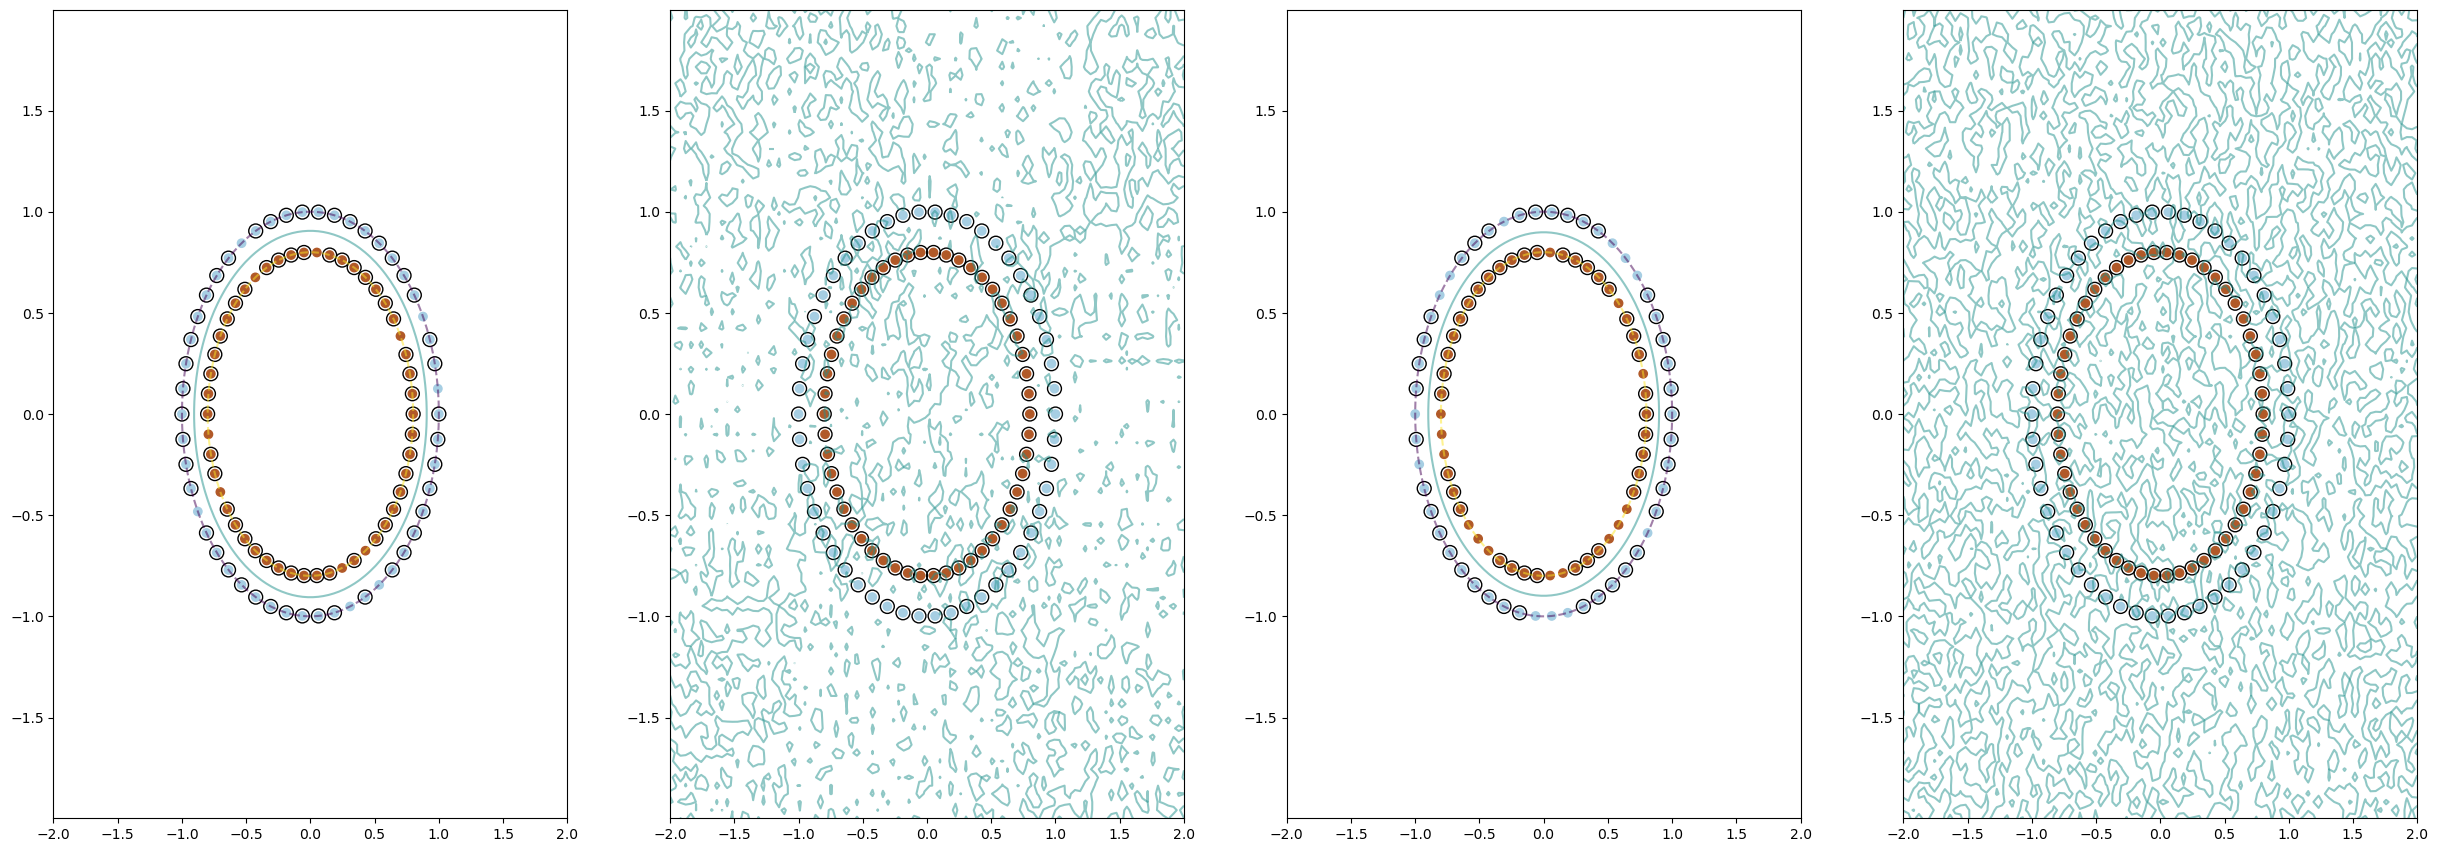

In [29]:
fig, axs = plt.subplots(1, 4)
fig.set_size_inches(30.5, 10.5, forward=True)

method_list = [['poly', 2],
               ['poly', 3],
               ['rbf', 0.7],
               ['sigmoid', 0.5]]

C = 3

for method, fig_num in zip(method_list, list(range(4))):
    if method[0] == 'poly':
        clf = SVC(kernel=method[0], degree=method[1], gamma='auto', C=C)
        clf.fit(circles_data[0], circles_data[1])
        plot(circles_data[0], circles_data[1], clf, axs[fig_num])
    else:
        clf = SVC(kernel=method[0], gamma=method[1], C=C)
        clf.fit(circles_data[0], circles_data[1])
        plot(circles_data[0], circles_data[1], clf, axs[fig_num])

plt.show()